In [1]:
!pip install librosa

  Using cached https://files.pythonhosted.org/packages/e9/7e/7a0f66f79a70a0a4c163ecf30429f6c1644c88654f135a9eee0bda457626/librosa-0.6.3.tar.gz
  Using cached https://files.pythonhosted.org/packages/f0/41/8cd160c6b2046b997d571a744a7f398f39e954a62dd747b2aae1ad7f07d4/audioread-2.1.6.tar.gz
    100% |████████████████████████████████| 17.3MB 1.1MB/s ta 0:00:011    88% |████████████████████████████▍   | 15.4MB 2.3MB/s eta 0:00:01
    100% |████████████████████████████████| 24.8MB 1.0MB/s ta 0:00:011
    100% |████████████████████████████████| 5.4MB 1.6MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/cd/c1/50a758e8247561e58cb87305b1e90b171b8c767b15b12a1734001f41d356/joblib-0.13.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/b6/66a06d85474190b50aee1a6c09cdc95bb405ac47338b27e9b21409da1760/resampy-0.2.1.tar.gz
    100% |████████████████████████████████| 3.3MB 1.7MB/s ta 0:00:011
    100% |████████████████████████████████| 16.8MB 1.2MB/s ta 

## In case of audioread.NoBackendError

You need to install codecs, e.g. ffmpeg:

https://linuxize.com/post/how-to-install-ffmpeg-on-ubuntu-18-04/

## we have to resample sound track using filters Farrow

In [1]:
import numpy as np
import librosa

In [2]:
!ls

'Fabrizio Paterlini – Primi Passi.mp3'
 FabrizioPaterliniPrimiPas.wav
 file2.wav
 file.wav
'Fleetwood Mac–The Chain.mp3'
 for_Anastasia.ipynb
'Kachesov 514'
 lab337
 ocos.rar
 oshilogr.odt
 oshilogr.pdf
 read_mp3_python.ipynb
 Romanyuk-YuA-Diskretnoe-preobrazovanie-Fure-v-tsifrovom-spektralnom-analize.djvu
 Romanyuk-YuA-Osnovy-tsifrovoi-obrabotki-signalov-Chast-1-Svoistva-i-preobrazovaniya-diskretnyh-signalov.djvu
 Tsaritsyn
 Untitled.ipynb


In [3]:
path = 'Fabrizio Paterlini – Primi Passi.mp3'
waveform, sr = librosa.core.load(path, sr=44100)

In [4]:
waveform.shape

(11429117,)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

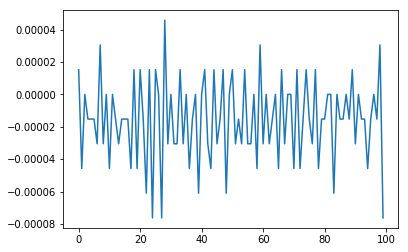

In [6]:
plt.plot(np.arange(100), waveform[-100:])

In [7]:
waveform.mean()

-1.3104668e-05

In [8]:
waveform.std()

0.09941936

In [9]:
import math

In [10]:
!pip install pydub

In [11]:
from pydub import AudioSegment
AudioSegment.converter = "/usr/bin/ffmpeg"

In [12]:
from pydub import AudioSegment

In [13]:
sound = AudioSegment.from_mp3("Fabrizio Paterlini – Primi Passi.mp3")

In [14]:
# get raw audio data as a bytestring
raw_data = sound.raw_data
# get the frame rate
sample_rate = sound._data
# get amount of bytes contained in one sample
sample_size = sound.sample_width
# get channels
channels = sound.channels

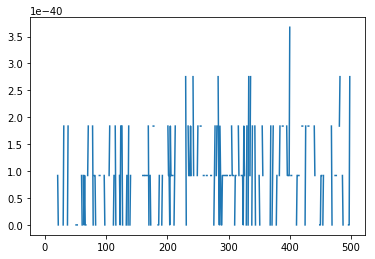

In [41]:
import matplotlib.pyplot as plt
import numpy as np
temp = np.frombuffer(raw_data, dtype=np.float32)
plt.plot(temp[-500:])

In [15]:
temp

array([-1, -1,  1, ...,  2, -3, -1], dtype=int16)

А теперь сделаем наконец-то фильтр Фарроу!!

In [18]:
def fu4(sn):
    a = np.zeros(4)
    a[0] = sn[2]
    a[3] = 1/6.*(sn[3]-sn[0])+1/2.*(sn[1]-sn[2])
    a[1] = 1/2.*(sn[3]-sn[1])-a[3]
    a[2] = sn[3]-sn[2]-a[1]-a[3]
    return a

def fu4_predict(a, x):
    X = np.array([1, -x, x**2, -x**3])
    return np.array(a).dot(X)

In [16]:
def filter_Farrou(temp, P, Q, x_0):
    Nx = np.size(temp)-1
    Ny = math.floor((Nx+x_0)*P/Q)+1
    k = np.arange(Ny+1)

    xk = k * Q / P - x_0
    n = np.modf(xk)[1]+2
    delta = 1 - np.modf(xk)[0]
    
    temp2 = np.concatenate(([0,0], temp, [0,0]))
    S = np.zeros(Ny+1)
    for i in range(0,Ny+1):
        ni = int(n[i])
        coef = fu4(temp2[ni-2:ni+2])
        S[i] = fu4_predict(coef,delta[i])
    
    return S

In [92]:
S = filter_Farrou(temp[10000000:10200000],3.,2.,0.2)

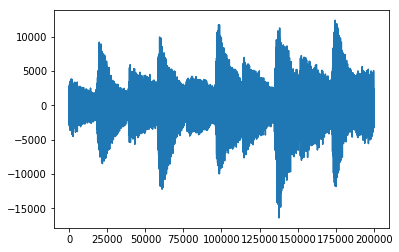

In [93]:
plt.plot(range(0,200000),temp[10000000:10200000])

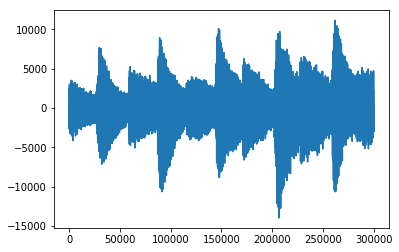

In [95]:
plt.plot(range(0,300000),S)

In [103]:
srate = 44100
srate_resampled = int(srate * 3/2)

librosa.output.write_wav('file.wav', S, srate_resampled)
librosa.output.write_wav('file2.wav', temp[10000000:10200000].astype(float), srate)
#мы создали ресемплированный звук и записали его в новый файл

In [39]:
S = filter_Farrou(temp[10000000:10400000],3.,1.,0.2)

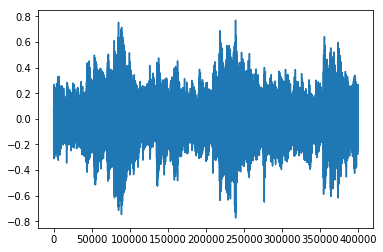

In [27]:
plt.plot(range(0,400000),waveform[10000000:10400000])

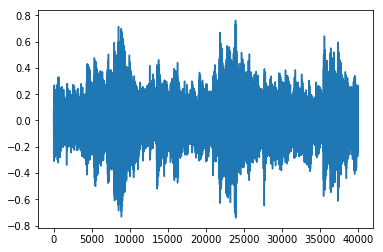

In [29]:
plt.plot(range(0,40001),S)

In [40]:
srate = 44100
srate_resampled = int(srate *3)

librosa.output.write_wav('file.wav', S, srate_resampled)
librosa.output.write_wav('file2.wav', temp[10000000:10400000].astype(float), srate)